In [ ]:
# Install necessary packages
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
!pip install patchify

# Import required libraries and set the SM_FRAMEWORK environment variable
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc

In [ ]:
#used for scaling the data, preserving the relative relationships between data points.
minmaxscaler = MinMaxScaler()

In [ ]:
#listing the files and directories within the specified directory
!ls -lah '/content/drive/MyDrive/Data_updated_zipped'

total 4.0K
drwx------ 2 root root 4.0K Sep  7 16:03 Data_updated


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -lah '/content/drive/MyDrive/Data_updated_zipped-20230901T142521Z-001'

ls: cannot access '/content/drive/MyDrive/Data_updated_zipped-20230901T142521Z-001': No such file or directory


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Data_updated_zipped'

In [ ]:
dataset_name = "HaryanaDataset"

In [ ]:
#using a directory-walking loop to traverse through the directory tree rooted at 'dataset_root_folder'.
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)

#For each directory ('path') encountered, checking if the directory name ('dir_name') is 'masks'.
#If the directory is named 'masks', it lists all files ('images') within that directory.
  if dir_name == 'masks':
   images = os.listdir(path)
   print(path)

# Then, for each image file ('image_name') in the 'masks' directory, checking if the file ends with '.png' and sets 'a' to True if it does.
# Essentially, identifying and marking the presence of PNG image files within the 'masks' directory.
   for i, image_name in enumerate(images):
       if (image_name.endswith('.png')):
         a = True

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/Data_updated/har_01.png',1)

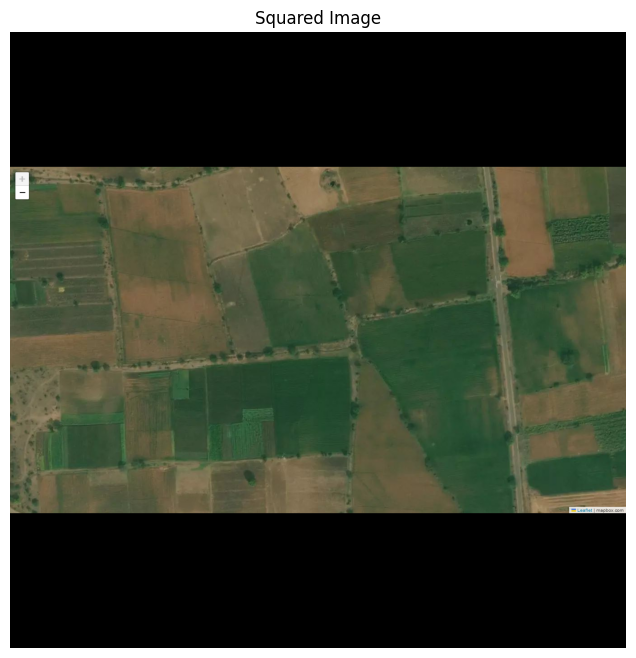

(768, 1366, 3)
(1366, 1366, 3)


In [ ]:
# Load the image
image_path = f'{dataset_root_folder}/Data_updated/har_01.png'
image = cv2.imread(image_path, 1)  # Read as a color image (BGR format)


#converting the image to square (not needed if the input images are already square)

# Check if the image was loaded successfully
if image is None:
    print(f"Failed to load image: {image_path}")
else:
    # Get the original image dimensions
    original_height, original_width, _ = image.shape

    # Determine the size for the square image (choose the larger dimension)
    square_size = max(original_height, original_width)

    # Create a blank square image
    square_image = np.zeros((square_size, square_size, 3), dtype=np.uint8)

    # Calculate the padding needed
    vertical_padding = (square_size - original_height) // 2
    horizontal_padding = (square_size - original_width) // 2

    # Place the original image in the center of the square image
    square_image[vertical_padding:vertical_padding+original_height, horizontal_padding:horizontal_padding+original_width] = image

    # Display the squared image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(square_image, cv2.COLOR_BGR2RGB))
    plt.title('Squared Image')
    plt.axis('off')
    plt.show()

    print(image.shape)
    print(square_image.shape)


In [ ]:
#initialising an empty list 'image_dataset' to store image data and sets the image file extension to "jpg".
image_dataset = []
image_extension = "png"



for image_id in range(1,20):
  image = cv2.imread(f'{dataset_root_folder}/Data_updated/har_{image_id}.{image_extension}',1)
  #print(image.shape)
  if image is not None:
    print(image.shape)


(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)
(768, 1366, 3)


In [ ]:
image_patch_size = 195

#we can change this patch_size
#smaller patch size gives magnified image

In [ ]:
# Initialize two empty lists, 'image_dataset' and 'mask_dataset', to store image and mask data, respectively.
image_dataset = []

image_type = 'images'
for image_id in range(1, 49):
    # Construct the path to the image file using 'dataset_root_folder', 'tile_id', 'image_type', and 'image_id'.
    image = cv2.imread(f'{dataset_root_folder}/Data_updated/har_{image_id}.{image_extension}', 1)

    # Check if the image was successfully read (i.e., not 'None').
    if image is not None:
        # If the image type is 'masks', convert it from BGR to RGB color space.
        if image_type == 'masks':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Calculate 'size_x' and 'size_y' to crop the image to a multiple of 'image_patch_size'.
        size_x = (image.shape[1] // image_patch_size) * image_patch_size
        size_y = (image.shape[0] // image_patch_size) * image_patch_size

        # Create a PIL Image object from the numpy array representation of the image.
        image = Image.fromarray(image)

        # Crop the image to 'size_x' and 'size_y'.
        image = image.crop((0, 0, size_x, size_y))

        # Convert the cropped image back to a numpy array.
        image = np.array(image)

        # Patchify the image into smaller patches of size '(image_patch_size, image_patch_size, 3)'.
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

        # Loop through the patched images.
        for i in range(patched_images.shape[0]):
            for j in range(patched_images.shape[1]):
                if image_type == 'images':
                    # If the image type is 'images', perform min-max scaling on the individual patched image.
                    individual_patched_image = patched_images[i, j, :, :]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    individual_patched_image = individual_patched_image[0]
                    image_dataset.append(individual_patched_image)



In [ ]:
print(len(image_dataset))

819


In [ ]:
image_dataset = np.array(image_dataset)

In [ ]:
from PIL import Image
import os

# Define the output directory where you want to save the JPG images
output_directory = '/content/drive/MyDrive/Finalcdis'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through the numpy image dataset and save each image as a JPG file
for i, image_array in enumerate(image_dataset):
    # Create a PIL Image object from the numpy array
    image = Image.fromarray((image_array * 255).astype('uint8'))

    # Define the output file path (you can customize the naming scheme here)
    output_file_path = os.path.join(output_directory, f'har_{i + 1}.jpg')

    # Save the image as a JPG file
    image.save(output_file_path)

    # Optionally, you can display a message to track progress
    print(f'Saved: {output_file_path}')

print('Conversion completed.')


Saved: /content/drive/MyDrive/Finalcdis/har_1.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_2.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_3.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_4.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_5.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_6.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_7.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_8.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_9.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_10.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_11.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_12.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_13.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_14.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_15.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_16.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_17.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_18.jpg
Saved: /content/drive/MyDrive/Finalcdis/har_19.jpg
Saved: /content/drive/MyDrive/Finalcdis/

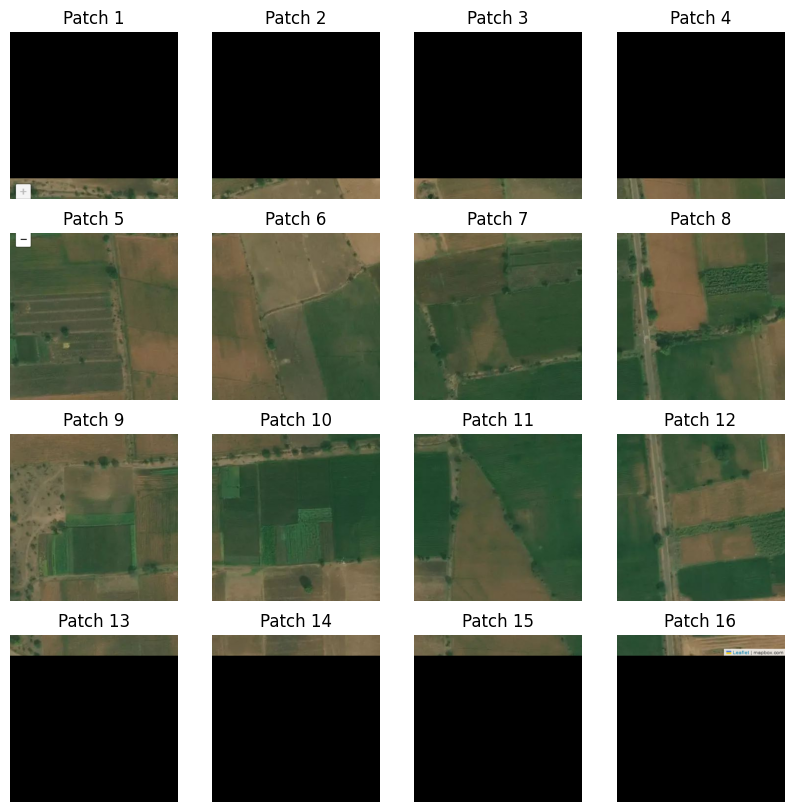

In [ ]:
# Define the number of patches (we will change this value as needed)
w = 4

# Calculate the size of each patch
patch_size = square_size // w

# Initialize lists to store the patches
patches = []

# Extract the patches
for i in range(w):
    for j in range(w):
        # Calculate the coordinates for patch extraction
        x_start = i * patch_size
        x_end = (i + 1) * patch_size
        y_start = j * patch_size
        y_end = (j + 1) * patch_size

        # Extract the patch from the image
        patch = square_image[x_start:x_end, y_start:y_end]

        # Append the patch to the list
        patches.append(patch)

# Display the patches
plt.figure(figsize=(10, 10))
for i in range(w * w):
    plt.subplot(w, w, i + 1)
    plt.imshow(cv2.cvtColor(patches[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Patch {i + 1}')

plt.show()


In [ ]:
# Define a function to calculate luminosity index for a given patch
def calculate_luminosity(patch):
    # Convert the patch to YUV color space
    patch = (patch * 255).astype(np.uint8)  # Convert to np.uint8
    yuv_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2YUV)

    # Extract the Y component (luminance) of the patch
    Y = yuv_patch[:,:,0]

    # Calculate the luminosity index (brightness) for the grayscale patch
    luminosity_index = np.mean(Y) / 255.0 * 100

    return luminosity_index


# Calculate and store the luminosity index for each patch
luminosity_indices = [calculate_luminosity(patch) for patch in image_dataset]

# # Display the patches along with their luminosity indices
# plt.figure(figsize=(10, 10))
# for i in range(w * w):
#     plt.subplot(w, w, i + 1)
#     plt.imshow(cv2.cvtColor(patches[i], cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.title(f'Patch {i + 1}\nLuminosity: {luminosity_indices[i]:.2f}')

# plt.show()

# Print the calculated luminosity indices
for i, luminosity in enumerate(luminosity_indices):
    print(f'Patch {i + 1} - Luminosity Index: {luminosity:.2f}')


Patch 1 - Luminosity Index: 42.34
Patch 2 - Luminosity Index: 52.18
Patch 3 - Luminosity Index: 42.40
Patch 4 - Luminosity Index: 60.11
Patch 5 - Luminosity Index: 46.06
Patch 6 - Luminosity Index: 54.13
Patch 7 - Luminosity Index: 48.14
Patch 8 - Luminosity Index: 51.17
Patch 9 - Luminosity Index: 38.69
Patch 10 - Luminosity Index: 58.50
Patch 11 - Luminosity Index: 43.12
Patch 12 - Luminosity Index: 38.86
Patch 13 - Luminosity Index: 41.98
Patch 14 - Luminosity Index: 52.61
Patch 15 - Luminosity Index: 34.17
Patch 16 - Luminosity Index: 50.51
Patch 17 - Luminosity Index: 53.91
Patch 18 - Luminosity Index: 38.03
Patch 19 - Luminosity Index: 49.45
Patch 20 - Luminosity Index: 56.14
Patch 21 - Luminosity Index: 50.08
Patch 22 - Luminosity Index: 42.15
Patch 23 - Luminosity Index: 47.46
Patch 24 - Luminosity Index: 39.95
Patch 25 - Luminosity Index: 48.78
Patch 26 - Luminosity Index: 47.32
Patch 27 - Luminosity Index: 39.11
Patch 28 - Luminosity Index: 37.04
Patch 29 - Luminosity Index: 

In [ ]:
type(luminosity_indices)

list

In [ ]:
import csv


# Define the CSV file name
csv_file_name = "luminosity_indices.csv"

# Open the CSV file in write mode
with open(csv_file_name, mode='w', newline='') as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the data to the CSV file row by row
    for value in luminosity_indices:
        # Convert each value to a list with a single element before writing
        csv_writer.writerow([value])

print(f"CSV file '{csv_file_name}' has been created.")


CSV file 'luminosity_indices.csv' has been created.


The luminosity index, also known as brightness or lightness, quantifies the perceived brightness or intensity of an image or a portion of an image. It's a measure of how bright or dark a pixel or a region is in an image. The luminosity index typically ranges from 0 to 100, where 0 represents complete darkness (black), and 100 represents full brightness (white).

In the context of an image or a grayscale patch:

A luminosity index of 0 means that the patch is entirely black.
A luminosity index of 100 means that the patch is entirely white.
Luminosity values in between represent varying levels of grayness or brightness.
By calculating the luminosity index, you can quantify and compare the brightness of different image regions or patches, which can be useful in various image processing and computer vision tasks.